# **Integral**
---

Anggota Kelompok:

*   Abizar Razak Aryakusuma
*   Diky Pribadi Santoso
*   Faisal Khalik Al Furqon
*   Ivan Septian
*   Wijoyo Raharjo Murti Indra Wahyono 

#1. Riemann Sum

## Divide & Conquer

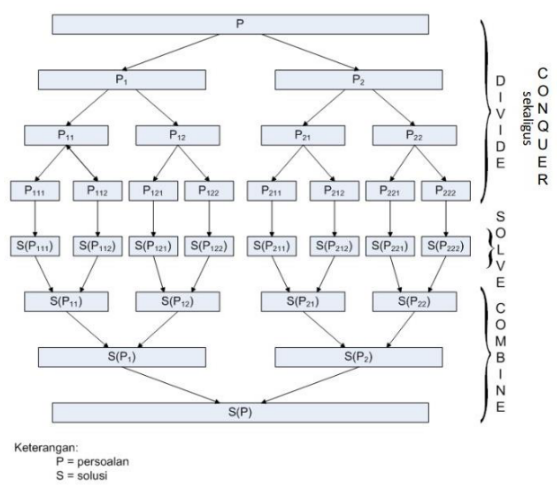

Contoh Integral:
<br>
2*x + 3 -> 0,5
<br>
(-x**2)+x+6 -> -2,3
<br>
((-x**2)+6*x)-x -> 0,5
<br>
(x**2)-1 -> 1,2

Masukan Integral (ex: 2*x + 3): 2*x + 3
Masukan Type Integral (left, right, mid, trapezoid): left
Batas Bawah (a): 0
Batas Atas (b): 5
Jumlah Partisi (N): 4
Luas Partition:  3.75
Luas Partition:  6.875
Luas Partition:  10.0
Luas Partition:  13.125
Jadi, luas integral tentu  2*x + 3 = 33.75


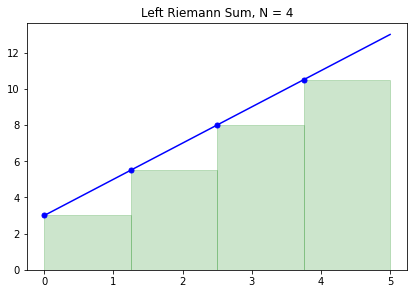

In [5]:
#import
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
import time

# Mengatasi limitasi algoritma rekursif pada python, dengan menambah limit rekursif
sys.setrecursionlimit(10000)

def calculateIntegral(typ, fx, a, b, N, w):
    # Jika lebar partisi sudah sesuai dengan yang diinginkan (batas atas - batas bawah <= lebar partisi)
    if (b-a <= w):
        # Kalkulasikan luas area sesuai dengan tipe
        # Left/Batas Bawah
        # Rumus luas = l(P1 + P2 + ... + Pn) = lP1 + lP2 + ... + lPn
        if typ == "left":
            print("Luas Partition: ", fx(a)*w)
            return fx(a) * w
        # Mid/Nilai Tengah(Atas-Bawah/2)
        elif typ == "mid":
            print("Luas Partition: ", fx((a+b)/2)*w)
            return fx((a+b)/2) * w
        # Right/Batas Atas 
        elif typ == "right":
            print("Luas Partition: ", fx(b)*w)
            return fx(b) * w
        # Trapesium 
        elif typ == "trapezoid":
            print("Luas Partition: ", (fx(a) + fx(b))  * w * 0.5)
            return (fx(a) + fx(b)) * w * 0.5
    # Jika lebar partisi masih besar
    else:
        # Membagi area partisi menjadi dua 
        # hingga lebar setiap partisi sesuai dengan lebar partisi untuk jumlah partisi yang diinginkan (n)
        # ex: rentang [0-16] menjadi 8 partisi maka setiap partisi akan memiliki lebar 2
        # Maka lebar partisi akan dibagi dua hingga lebar setiap partisi mencapai 2
        # ex: rekursif 1 => partisi = 2, lebar = 8
        #     rekursif 2 => partisi = 4, lebar = 4
        #     rekursif 3 => partisi = 8, lebar = 2 -> sesuai
        N_1 = N//2
        N_2 = N - N_1
        
        # a dan b partisi 1
        a_1 = a
        b_1 = a + N_1 * w

        # a dan b partisi 2
        a_2 = b_1
        b_2 = b


        # Algoritma rekursif
        # Algoritma rekursif ini bertujuan untuk membagi partisi hingga lebar setiap partisi sesuai dengan yang diinginkan
        # Luas didapat dari penjumlahan nilai setiap partisi
        return calculateIntegral(typ, fx, a_1, b_1, N_1, w) + calculateIntegral(typ, fx, a_2, b_2, N_2, w)
        

def plotIntegral(fx, strFx, typ):
    f = fx
    a = int(input("Batas Bawah (a): "))
    b = int(input("Batas Atas (b): "))
    N = int(input("Jumlah Partisi (N): "))
    n = 10
    wid = (b-a)/N

    x = np.linspace(a,b,N+1)
    y = f(x)

    X = np.linspace(a,b,n*N+1)
    Y = f(X)

    plt.figure(figsize=(15,10))

    if typ == "left" :
      # LEFT RIEMANN SUM
      plt.subplot(2,2,1)
      plt.plot(X,Y,'b')
      x_left = x[:-1] # Left endpoints
      y_left = y[:-1]
      plt.plot(x_left,y_left,'b.',markersize=10)
      plt.bar(x_left,y_left,width=wid,alpha=0.2,align='edge',edgecolor='g', color='green')
      plt.title('Left Riemann Sum, N = {}'.format(N))    
    
    elif typ == "mid":
      # MIDPOINT RIEMANN SUM
      plt.subplot(2,2,2)
      plt.plot(X,Y,'b')
      x_mid = (x[:-1] + x[1:])/2 # Midpoints
      y_mid = f(x_mid)
      plt.plot(x_mid, y_mid,'b.',markersize=10)
      plt.bar(x_mid, y_mid, width=wid, alpha=0.2, edgecolor='g', color='green')
      plt.title('Midpoint Riemann Sum, N = {}'.format(N))

    elif typ == "rigt":
      # RIGHT RIEMANN SUM
      plt.subplot(2,2,3)
      plt.plot(X,Y,'b')
      x_right = x[1:] # Right endpoints
      y_right = y[1:]
      plt.plot(x_right,y_right,'b.',markersize=10)
      plt.bar(x_right, y_right, width=-wid, alpha=0.2, align='edge', edgecolor='g', color='green')
      plt.title('Right Riemann Sum, N = {}'.format(N))
    
    elif typ == "trapezoid":
      # TRAPEZOIDAL RULE
      plt.subplot(2,2,4)
      plt.plot(X,Y,'b')
      for i in range(N):
          x_tr = [x[i],x[i],x[i+1],x[i+1]]
          y_tr = [0,f(x[i]),f(x[i+1]),0]
          plt.fill(x_tr, y_tr ,'b.', edgecolor='b', alpha=0.2, color='green')
      plt.title('Trapezoidal Rule, N = {}'.format(N))

    # Hitung Integral
    result = calculateIntegral(typ, fx, a, b, N, wid)
    print("Jadi, luas integral tentu " , strFx, "=", result)

    # Print Graph (Grafik)
    plt.show()

# Main Program
integral_input = input("Masukan Integral (ex: 2*x + 3): ")
integral = eval("lambda x:" + integral_input) # Ubah integral input (text) menjadi fungsi matematika dengan fungsi eval python
tipe = input("Masukan Type Integral (left, right, mid, trapezoid): ") # Tipe Integral

# Panggil Fungsi
plotIntegral(integral, integral_input, tipe)

## Simple Riemann Sum

In [26]:
# Import Numpy
import numpy as np

# Fungsi Untuk Menghitung Integral
def calculate_integral(f, a, b, n, typ):
    result = 0
    w = (b - a)/n
    if typ == "left":
      x = a
      while (x < b):
        result += f(x)
        x = x + w
      result *= w
    elif typ == "right":
      x = a
      while (x < b):
        x = x + w
        result += f(x)
      result *= w
    elif typ == "mid":
      x = a + w
      while (x < b):
        result += f(x)
        x = x + 2 * w
      result *= 2 * w
    elif typ == "trapezoid":
      result = 0.5*f(a) + sum([f(a + i*w) for i in range(1, n)]) + 0.5*f(b)
      result *= w
    return result

# Main Program
integral_input = input("Masukan Integral (ex: 2*x + 3): ")
f = eval("lambda x:" + integral_input) # Ubah integral input (text) menjadi fungsi matematika dengan fungsi eval python
a = int(input("Batas Bawah (a): "))
b = int(input("Batas Atas (b): "))
n = int(input("Jumlah Partisi (n): "))
tipe = input("Masukan Type Integral (left, right, mid, trapezoid): ") # Tipe Integral
print("Luas = ", calculate_integral(f, a, b, n, tipe))

Masukan Integral (ex: 2*x + 3): 2*x+3
Batas Bawah (a): 0
Batas Atas (b): 5
Jumlah Partisi (n): 4
Masukan Type Integral (left, right, mid, trapezoid): mid
Luas =  40.0


#2. Simpson Rule 1/3

In [28]:
# Import Math
import math

# Main Program
a = int(input("Masukan Batas Bawah (a): "))
b = int(input("Masukan Batas Atas (b): "))
n = int(input("Masukan Interval (n): "))
integral_input = input("Masukan Integral (ex: 2*x + 3): ")
f = eval("lambda x:" + integral_input) # Ubah integral input (text) menjadi fungsi matematika dengan fungsi eval python

def simpsonSatuPerTiga(a,b,n):
    h = (b - a) / n
    sum = f(a) + f(b)

    for i in range(1,n):
        c = a + i * h
        # Prima/Bukan Prima
        if i%2==0:
            sum += 2 * f(c)
        else:
            sum += 4 * f(c)

    ans = (h / 3) * sum
    return ans

result= simpsonSatuPerTiga(a,b,n)
print("Luas Dengan Metode Simpson 1/3: ", result)

Masukan Batas Bawah (a): 0
Masukan Batas Atas (b): 5
Masukan Interval (n): 4
Masukan Integral (ex: 2*x + 3): 2*x+3
Luas Dengan Metode Simpson 1/3:  40.0
